In [1]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [2]:
styles = pd.read_csv('styles.csv')

styles['id'] = styles['id'].astype('Int64') 
styles['image_name'] = styles['id'].astype(str) + '.jpg'

image_labels = dict(zip(styles['image_name'], styles['articleType']))

print("Contoh nama file di image_labels:")
print(list(image_labels.keys())[:5]) 

Contoh nama file di image_labels:
['1163.jpg', '1164.jpg', '1165.jpg', '1525.jpg', '1526.jpg']


In [3]:
print(styles.head())

     id  gender masterCategory subCategory articleType baseColour  season  \
0  1163     Men        Apparel     Topwear     Tshirts       Blue  Summer   
1  1164     Men        Apparel     Topwear     Tshirts       Blue  Winter   
2  1165     Men        Apparel     Topwear     Tshirts       Blue  Summer   
3  1525  Unisex    Accessories        Bags   Backpacks  Navy Blue    Fall   
4  1526  Unisex    Accessories        Bags   Backpacks      Black    Fall   

     year   usage                                productDisplayName  \
0  2011.0  Sports  Nike Sahara Team India Fanwear Round Neck Jersey   
1  2015.0  Sports           Nike Men Blue T20 Indian Cricket Jersey   
2  2013.0  Sports               Nike Mean Team India Cricket Jersey   
3  2010.0  Casual                      Puma Deck Navy Blue Backpack   
4  2010.0  Sports                       Puma Big Cat Backpack Black   

  Unnamed: 10 image_name  
0         NaN   1163.jpg  
1         NaN   1164.jpg  
2         NaN   1165.jpg  
3 

In [4]:
# Load model ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
model = tf.keras.models.Sequential([base_model, GlobalMaxPool2D()])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result / norm(result) 
    return norm_result

In [ ]:
filenames = [os.path.join('images', file) for file in os.listdir('images') if file.endswith('.jpg')]

normalized_image_labels = {key.lower(): value for key, value in image_labels.items()}

image_features = []
labels = []

for file in filenames:
    features = extract_features_from_images(file, model)
    image_features.append(features)

    file_name = os.path.basename(file).lower()
    label = normalized_image_labels.get(file_name, 'Unknown')  # Default 'Unknown' jika label tidak ditemukan
    labels.append(label)

print(f"Extracted features for {len(image_features)} images.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [7]:
# Simpan fitur, label, dan filenames
with open('features_with_labels.pkl', 'wb') as f:
    pkl.dump((image_features, labels, filenames), f)
print("Features and labels saved to 'features_with_labels.pkl'.")

Features and labels saved to 'features_with_labels.pkl'.


In [6]:
# Memuat kembali data
with open('features_with_labels.pkl', 'rb') as f:
    loaded_features, loaded_labels, loaded_filenames = pkl.load(f)

print(f"Loaded {len(loaded_features)} features and labels.")
print(f"Example label: {loaded_labels[0]}, Filename: {loaded_filenames[0]}")

Loaded 11961 features and labels.
Example label: Tshirts, Filename: images\1163.jpg


In [25]:
# Model KNN untuk rekomendasi
neighbors = NearestNeighbors(n_neighbors=5, metric='euclidean', algorithm='brute')
neighbors.fit(loaded_features)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [26]:
def find_similar_images(image_path, model, neighbors, loaded_features, loaded_filenames, loaded_labels):
    query_features = extract_features_from_images(image_path, model)
    distances, indices = neighbors.kneighbors([query_features])
    
    print("Gambar serupa ditemukan:")
    for i in indices[0]:
        
        # Menampilkan gambar
        img_path = loaded_filenames[i]
        img = image.load_img(img_path)
        plt.imshow(img)
        plt.title(f"Label: {loaded_labels[i]}")
        plt.axis('off')
        plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Gambar serupa ditemukan:


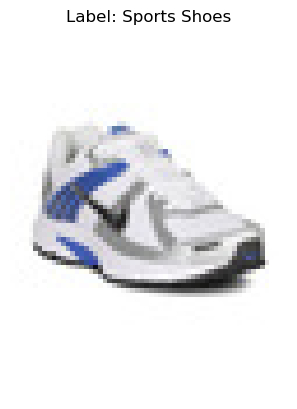

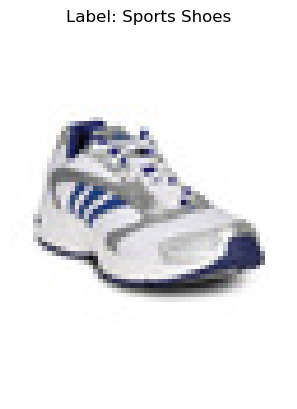

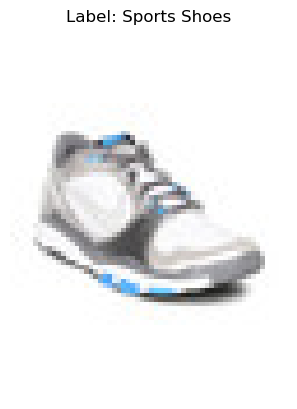

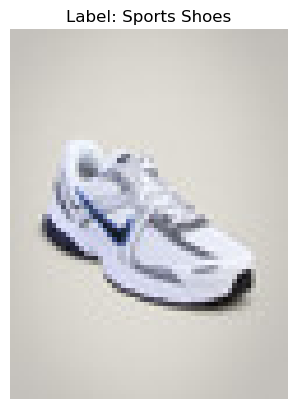

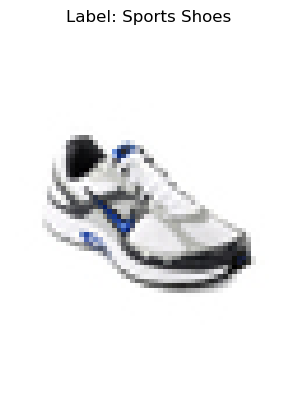

In [27]:
# Coba dengan gambar baru
test_image_path = '1827.jpg' 
find_similar_images(test_image_path, model, neighbors, loaded_features, loaded_filenames, loaded_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
Gambar serupa ditemukan:


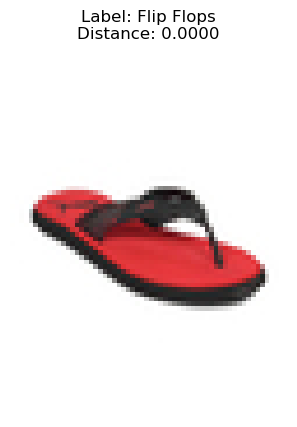

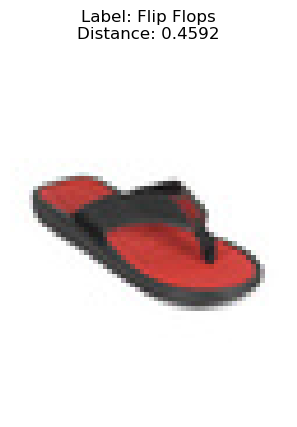

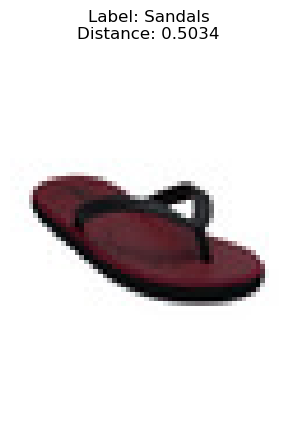

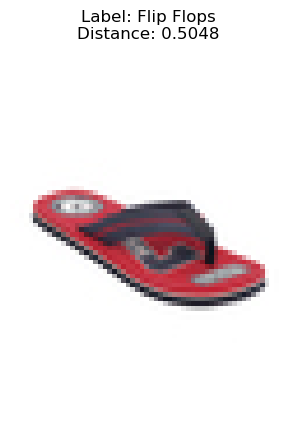

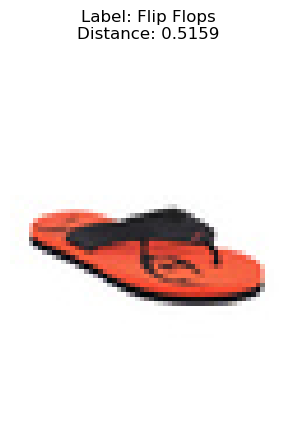

Label gambar query: Flip Flops
Akurasi hasil rekomendasi: 80.00%


In [29]:
from sklearn.metrics import accuracy_score

def find_similar_images_with_similarity_score(image_path, model, neighbors, loaded_features, loaded_filenames, loaded_labels):
    # Ekstraksi fitur dari gambar query
    query_features = extract_features_from_images(image_path, model)
    
    # Dapatkan indeks dan jarak gambar serupa
    distances, indices = neighbors.kneighbors([query_features])
    
    # Label gambar query
    query_label = loaded_labels[loaded_filenames.index(image_path)]
    
    # Inisialisasi untuk menyimpan label gambar hasil rekomendasi
    recommended_labels = []
    
    print("Gambar serupa ditemukan:")
    for dist, i in zip(distances[0], indices[0]):
        # Menampilkan gambar
        img_path = loaded_filenames[i]
        img = image.load_img(img_path)
        plt.imshow(img)
        plt.title(f"Label: {loaded_labels[i]}\nDistance: {dist:.4f}")
        plt.axis('off')
        plt.show()
        
        # Tambahkan label ke daftar
        recommended_labels.append(loaded_labels[i])
    
    # Hitung akurasi
    matching_labels = sum(1 for label in recommended_labels if label == query_label)
    accuracy = (matching_labels / len(recommended_labels)) * 100
    
    print(f"Label gambar query: {query_label}")
    print(f"Akurasi hasil rekomendasi: {accuracy:.2f}%")

# Coba dengan gambar baru
test_image_path = 'images\\2250.jpg'  
find_similar_images_with_similarity_score(test_image_path, model, neighbors, loaded_features, loaded_filenames, loaded_labels)


In [ ]:
#interval
#< 1.0: Gambar mirip.
#1.0 - 2.0: Gambar agak mirip.
#> 2.0: Gambar tidak mirip.

#Akurasi dihitung berdasarkan kesesuaian label antara gambar query dan gambar yang direkomendasikan
#Menggunakan jarak hanya untuk memberi peringkat atau menentukan gambar yang paling mirip